# House Price Prediction

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Reading the Dataset

In [2]:
housing = pd.DataFrame(pd.read_csv("ParisHousing.csv"))

In [3]:
housing.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  numPrevOwners  made  \
0         75523              3        0        1      63              8  2005   
1         80771             39        1        1      98              6  2015   
2         55712             58        0        1      19              8  2021   
3         32316             47        0        0       6              4  2012   
4         70429             19        1        1      90              7  1990   

   isNewBuilt  basement  attic  garage  hasGuestRoom      price  
0           0      4313   9005     956             7  7559081.5  
1           1      3653   2436     128             2  8085989.5  
2           0      2937   8852     135             9  5574642.1  
3           0       659   7141     359             3  3232561.2  
4           1      8435   2429     292             4  7055052.0

In [4]:
housing.shape

(10000, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   squareMeters   10000 non-null  int64  
 1   numberOfRooms  10000 non-null  int64  
 2   hasYard        10000 non-null  int64  
 3   hasPool        10000 non-null  int64  
 4   floors         10000 non-null  int64  
 5   numPrevOwners  10000 non-null  int64  
 6   made           10000 non-null  int64  
 7   isNewBuilt     10000 non-null  int64  
 8   basement       10000 non-null  int64  
 9   attic          10000 non-null  int64  
 10  garage         10000 non-null  int64  
 11  hasGuestRoom   10000 non-null  int64  
 12  price          10000 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 1015.8 KB


In [6]:
housing.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

       numPrevOwners         made    isNewBuilt      basement        attic  \
count   10000.000000  10000.00000  10000.000000  10000.000000  10000.00000   
mean        5.521700   2005.48850      0.499100   5033.103900   5028.01060   
std         2.856667      9.30809      0.500024   2876.729545   2894.33221   
min         1.000000   1990.00000      0.000000      0.000000      1.00000   
25%         3.000000   1997.00000      0.000000   2559.750000   2512.00000   
50%         5.000000   2005.50000      0.000000   5092.500000   5045.00000   
75%         8.000000   2014.00000      1.000000   7511.250000   7540.50000   
max        10.000000   2021.00000      1.000000  10000.000000  10000.00000   

            garage  hasGuestRoom         price  
count  10000.00000   10000.00000  1.000000e+04  
mean     553.12120       4.99460  4.993448e+06  
std      262.05017       3.17641  2.877424e+06  
min      100.00000       0.00000  1.031350e+04  
25%      327.75000       2.00000  2.516402e+06  
50%      554.00000       5.00000  5.016180e+06  
75%      777.25000       8.00000  7.469092e+06  
max     1000.00000      10.00000  1.000677e+07

In [7]:
housing.isnull().sum()

squareMeters     0
numberOfRooms    0
hasYard          0
hasPool          0
floors           0
numPrevOwners    0
made             0
isNewBuilt       0
basement         0
attic            0
garage           0
hasGuestRoom     0
price            0
dtype: int64

### Pairplot

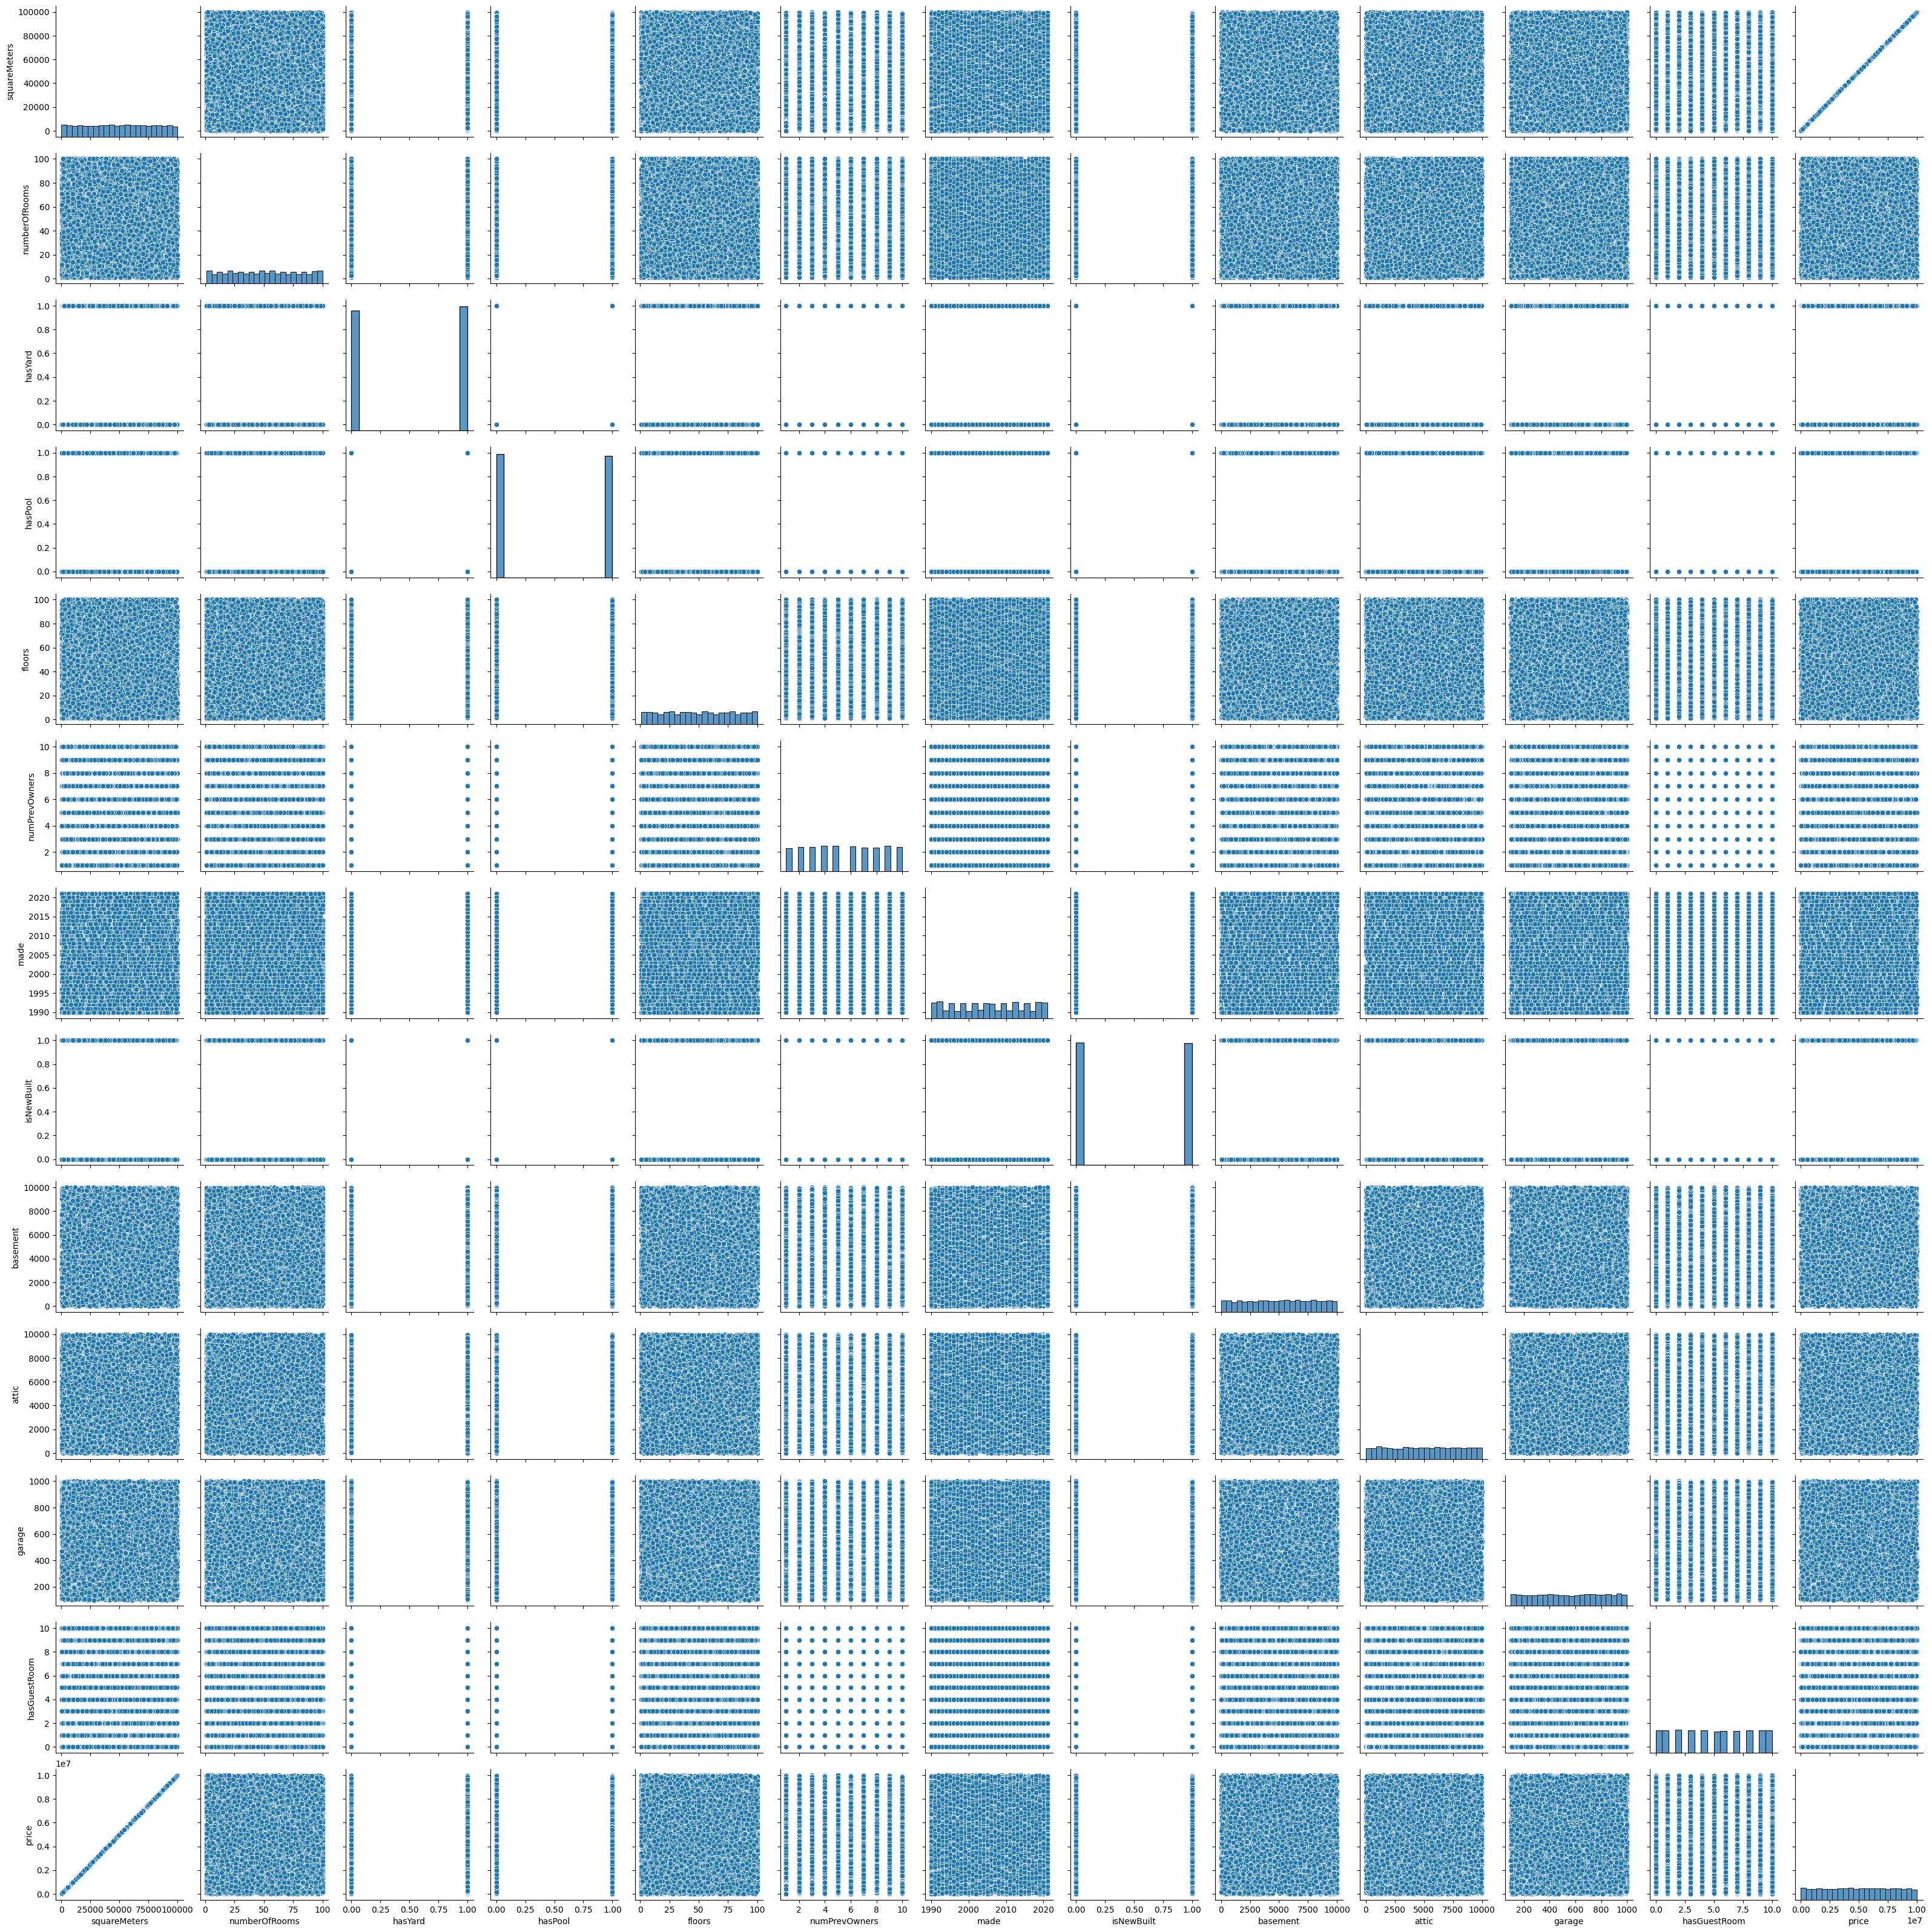

In [8]:
sns.pairplot(housing)
plt.show()

### Correlation Matrix

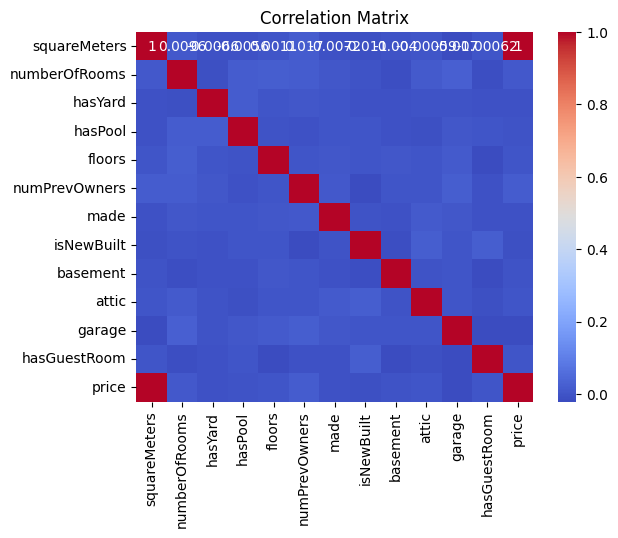

In [9]:
correlation_matrix = housing.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Linear Regression

In [15]:
X = housing[['squareMeters','numberOfRooms','hasYard','hasPool','floors','numPrevOwners','made','isNewBuilt','basement','attic','garage','hasGuestRoom']]
y = housing['price']

In [11]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Mean Squared Error and R-squared for model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3714325.39897683
R-squared: 0.9999995759300314


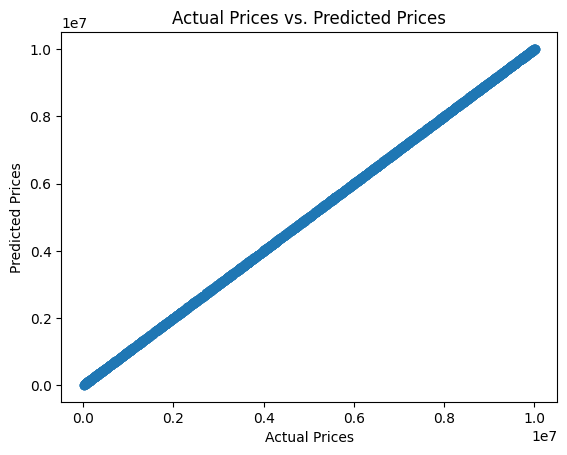

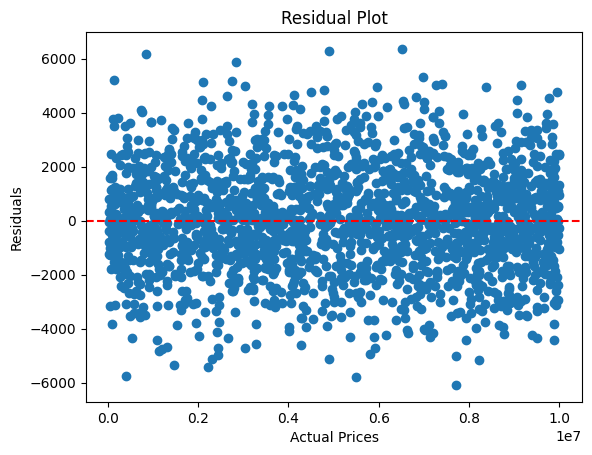

Predicted Price: 3870081.9147546994


In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

# We can also create a residual plot to check the model's performance
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Lastly, let's use the trained model to make predictions on new data and visualize the results
new_data = [[38686,42,0,0,14,10,2021,1,5098,5542,591,3]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])